In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [95]:
data = pd.read_csv('train_data.csv')
test = pd.read_csv("test_data.csv")
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [98]:
data.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [99]:
test.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [100]:
gardenmode = data["Garden"].mode()[0]
data["Garden"].fillna(gardenmode, inplace=True)
gardenmodet = test["Garden"].mode()[0]
test["Garden"].fillna(gardenmodet, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Building Dimension'>

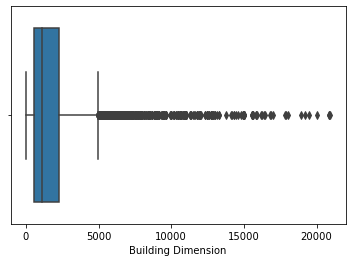

In [101]:
sns.boxplot(data["Building Dimension"])

In [102]:
buildmed = data["Building Dimension"].median()
data["Building Dimension"].fillna(buildmed, inplace=True)
buildmedt = test["Building Dimension"].median()
test["Building Dimension"].fillna(buildmedt, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date_of_Occupancy'>

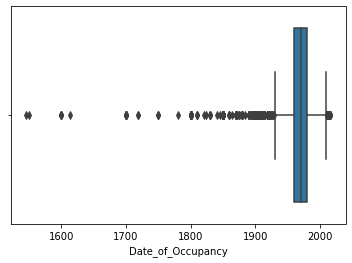

In [103]:
sns.boxplot(data["Date_of_Occupancy"])

In [104]:
datmed = data["Date_of_Occupancy"].median()
data["Date_of_Occupancy"].fillna(datmed, inplace=True)
datmedt = test["Date_of_Occupancy"].median()
test["Date_of_Occupancy"].fillna(datmedt, inplace=True)

In [105]:
data.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension      0
Building_Type           0
Date_of_Occupancy       0
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [106]:
test.isna().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building Dimension     0
Building_Type          0
Date_of_Occupancy      0
NumberOfWindows        0
Geo_Code              13
dtype: int64

In [107]:
data["Geo_Code"].unique()

array(['1053', '1143', '1160', ..., '2B096', '2B353', nan], dtype=object)

In [108]:
data["Geo_Code"] = data["Geo_Code"].str.replace(r'[^0-9]', '')
data["Geo_Code"] = data["Geo_Code"].astype(float)
test["Geo_Code"] = test["Geo_Code"].str.replace(r'[^0-9]', '')
test["Geo_Code"] = test["Geo_Code"].astype(float)

<ipython-input-108-d50ed6f75cbe>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Geo_Code"] = data["Geo_Code"].str.replace(r'[^0-9]', '')
<ipython-input-108-d50ed6f75cbe>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test["Geo_Code"] = test["Geo_Code"].str.replace(r'[^0-9]', '')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geo_Code'>

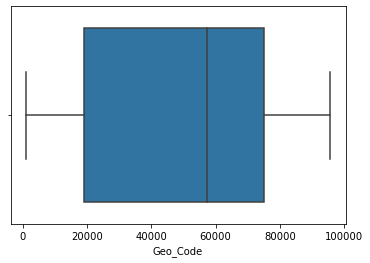

In [109]:
sns.boxplot(data["Geo_Code"])

In [110]:
geod = data["Geo_Code"].mean()
data["Geo_Code"].fillna(geod, inplace=True)
geodt = test["Geo_Code"].mean()
test["Geo_Code"].fillna(geodt, inplace=True)

In [111]:
data.isna().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [112]:
test.isna().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

In [113]:
len(test)

3069

In [114]:
testcus = test["Customer Id"]
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053.0,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053.0,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053.0,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053.0,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053.0,0


In [115]:
data["NumberOfWindows"] = data["NumberOfWindows"].str.strip() 
data["NumberOfWindows"] = data["NumberOfWindows"].replace('>=10', '10')  
data["NumberOfWindows"] = data["NumberOfWindows"].replace('.', '0') 
data["NumberOfWindows"] = data["NumberOfWindows"].astype(float)
test["NumberOfWindows"] = test["NumberOfWindows"].str.strip() 
test["NumberOfWindows"] = test["NumberOfWindows"].replace('>=10', '10')  
test["NumberOfWindows"] = test["NumberOfWindows"].replace('.', '0') 
test["NumberOfWindows"] = test["NumberOfWindows"].astype(float)

In [116]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3.0,3310.0
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3.0,3310.0
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,0.0,3310.0
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3.0,3321.0
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3.0,3321.0


In [117]:
data[["YearOfObservation", "Insured_Period", "Building Dimension","Building_Type","Date_of_Occupancy","NumberOfWindows","Geo_Code"]]=data[["YearOfObservation", "Insured_Period", "Building Dimension","Building_Type","Date_of_Occupancy","NumberOfWindows","Geo_Code"]].astype(float)

In [118]:
test[["YearOfObservation", "Insured_Period", "Building Dimension","Building_Type","Date_of_Occupancy","NumberOfWindows","Geo_Code"]]=test[["YearOfObservation", "Insured_Period", "Building Dimension","Building_Type","Date_of_Occupancy","NumberOfWindows","Geo_Code"]].astype(float)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   float64
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   float64
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   float64
 12  Geo_Code            7160 non-null   float64
 13  Claim               7160 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 783.2+ KB


In [120]:
data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013.0,1.000000,0,N,V,V,U,290.0,1.0,1960.0,0.0,1053.000000,0
1,H2037,2015.0,1.000000,0,V,N,O,R,490.0,1.0,1850.0,4.0,1053.000000,0
2,H3802,2014.0,1.000000,0,N,V,V,U,595.0,1.0,1960.0,0.0,1053.000000,0
3,H3834,2013.0,1.000000,0,V,V,V,U,2840.0,1.0,1960.0,0.0,1053.000000,0
4,H5053,2014.0,1.000000,0,V,N,O,R,680.0,1.0,1800.0,3.0,1053.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,H5290,2012.0,1.000000,1,V,V,V,U,1083.0,1.0,2001.0,0.0,50394.259139,0
7156,H5926,2013.0,1.000000,0,V,V,V,U,1083.0,2.0,1980.0,0.0,50394.259139,1
7157,H6204,2016.0,0.038251,0,V,V,V,U,1083.0,1.0,1992.0,0.0,50394.259139,0
7158,H6537,2013.0,1.000000,0,V,V,V,U,1083.0,1.0,1972.0,0.0,50394.259139,0


In [121]:
categoryval = ["Building_Painted","Building_Fenced","Garden","Settlement"]
data = pd.get_dummies(data, prefix_sep="_", columns=categoryval)

In [122]:
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_O,Garden_V,Settlement_R,Settlement_U
0,H14663,2013.0,1.0,0,290.0,1.0,1960.0,0.0,1053.0,0,1,0,0,1,0,1,0,1
1,H2037,2015.0,1.0,0,490.0,1.0,1850.0,4.0,1053.0,0,0,1,1,0,1,0,1,0
2,H3802,2014.0,1.0,0,595.0,1.0,1960.0,0.0,1053.0,0,1,0,0,1,0,1,0,1
3,H3834,2013.0,1.0,0,2840.0,1.0,1960.0,0.0,1053.0,0,0,1,0,1,0,1,0,1
4,H5053,2014.0,1.0,0,680.0,1.0,1800.0,3.0,1053.0,0,0,1,1,0,1,0,1,0


In [123]:
test = pd.get_dummies(test, prefix_sep="_", columns=categoryval)

In [124]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_O,Garden_V,Settlement_R,Settlement_U
0,H11920,2013.0,1.000000,0,300.0,1.0,1960.0,3.0,3310.0,0,1,1,0,1,0,1,0
1,H11921,2016.0,0.997268,0,300.0,1.0,1960.0,3.0,3310.0,0,1,1,0,1,0,1,0
2,H9805,2013.0,0.369863,0,790.0,1.0,1960.0,0.0,3310.0,0,1,0,1,0,1,0,1
3,H7493,2014.0,1.000000,0,1405.0,1.0,2004.0,3.0,3321.0,0,1,1,0,1,0,1,0
4,H7494,2016.0,1.000000,0,1405.0,1.0,2004.0,3.0,3321.0,0,1,1,0,1,0,1,0


In [125]:
X=data.drop(['Customer Id','Claim'], axis=1)
Y=data['Claim']

In [126]:
X.head()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_O,Garden_V,Settlement_R,Settlement_U
0,2013.0,1.0,0,290.0,1.0,1960.0,0.0,1053.0,1,0,0,1,0,1,0,1
1,2015.0,1.0,0,490.0,1.0,1850.0,4.0,1053.0,0,1,1,0,1,0,1,0
2,2014.0,1.0,0,595.0,1.0,1960.0,0.0,1053.0,1,0,0,1,0,1,0,1
3,2013.0,1.0,0,2840.0,1.0,1960.0,0.0,1053.0,0,1,0,1,0,1,0,1
4,2014.0,1.0,0,680.0,1.0,1800.0,3.0,1053.0,0,1,1,0,1,0,1,0


In [127]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_O,Garden_V,Settlement_R,Settlement_U
0,-0.483896,0.376419,-0.663155,-0.698973,-1.260978,-0.139649,-0.867014,-1.645348,1.739827,-1.739827,-1.007852,1.007852,-1.008134,1.008134,-1.008415,1.008415
1,0.961534,0.376419,-0.663155,-0.610600,-1.260978,-3.307129,0.721070,-1.645348,-0.574770,0.574770,0.992209,-0.992209,0.991932,-0.991932,0.991655,-0.991655
2,0.238819,0.376419,-0.663155,-0.564205,-1.260978,-0.139649,-0.867014,-1.645348,1.739827,-1.739827,-1.007852,1.007852,-1.008134,1.008134,-1.008415,1.008415
3,-0.483896,0.376419,-0.663155,0.427781,-1.260978,-0.139649,-0.867014,-1.645348,-0.574770,0.574770,-1.007852,1.007852,-1.008134,1.008134,-1.008415,1.008415
4,0.238819,0.376419,-0.663155,-0.526646,-1.260978,-4.746893,0.324049,-1.645348,-0.574770,0.574770,0.992209,-0.992209,0.991932,-0.991932,0.991655,-0.991655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,-1.206611,0.376419,1.507943,-0.348575,-1.260978,1.040957,-0.867014,0.000000,-0.574770,0.574770,-1.007852,1.007852,-1.008134,1.008134,-1.008415,1.008415
7156,-0.483896,0.376419,-0.663155,-0.348575,-0.197789,0.436256,-0.867014,0.000000,-0.574770,0.574770,-1.007852,1.007852,-1.008134,1.008134,-1.008415,1.008415
7157,1.684248,-3.635231,-0.663155,-0.348575,-1.260978,0.781800,-0.867014,0.000000,-0.574770,0.574770,-1.007852,1.007852,-1.008134,1.008134,-1.008415,1.008415
7158,-0.483896,0.376419,-0.663155,-0.348575,-1.260978,0.205894,-0.867014,0.000000,-0.574770,0.574770,-1.007852,1.007852,-1.008134,1.008134,-1.008415,1.008415


In [128]:
testdf = test.drop(['Customer Id'], axis=1)

In [129]:
testdf=pd.DataFrame(scaler.fit_transform(testdf), columns = testdf.columns)
testdf

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_O,Garden_V,Settlement_R,Settlement_U
0,-0.432737,0.352438,-0.537545,-0.606938,-1.361714,-0.320750,0.865698,-1.285594,-0.906888,0.906888,1.643792,-1.643792,1.649242,-1.649242,1.643792,-1.643792
1,1.753988,0.339964,-0.537545,-0.606938,-1.361714,-0.320750,0.865698,-1.285594,-0.906888,0.906888,1.643792,-1.643792,1.649242,-1.649242,1.643792,-1.643792
2,-0.432737,-2.524508,-0.537545,-0.388830,-1.361714,-0.320750,-0.549264,-1.285594,-0.906888,0.906888,-0.608350,0.608350,-0.606339,0.606339,-0.608350,0.608350
3,0.296171,0.352438,-0.537545,-0.115082,-1.361714,1.675230,0.865698,-1.285240,-0.906888,0.906888,1.643792,-1.643792,1.649242,-1.649242,1.643792,-1.643792
4,1.753988,0.352438,-0.537545,-0.115082,-1.361714,1.675230,0.865698,-1.285240,-0.906888,0.906888,1.643792,-1.643792,1.649242,-1.649242,1.643792,-1.643792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,1.025079,0.352438,-0.537545,-0.339867,1.643391,-3.042540,-0.549264,0.000000,-0.906888,0.906888,-0.608350,0.608350,-0.606339,0.606339,-0.608350,0.608350
3065,-1.161646,0.352438,-0.537545,-0.339867,-0.360012,-0.865108,-0.549264,0.000000,-0.906888,0.906888,-0.608350,0.608350,-0.606339,0.606339,-0.608350,0.608350
3066,-1.161646,0.352438,-0.537545,-0.339867,-0.360012,1.176235,-0.549264,0.000000,-0.906888,0.906888,-0.608350,0.608350,-0.606339,0.606339,-0.608350,0.608350
3067,-0.432737,0.352438,-0.537545,-0.339867,-1.361714,-7.578858,-0.549264,0.000000,-0.906888,0.906888,-0.608350,0.608350,-0.606339,0.606339,-0.608350,0.608350


In [130]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
7155    0
7156    1
7157    0
7158    0
7159    0
Name: Claim, Length: 7160, dtype: int64

In [131]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
models = {'DecisionTreeClassifier':DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=7),
          "XGBClassifier": XGBClassifier(),
          "LogisticRegression": LogisticRegression(max_iter=100)}

In [132]:
def cross_val_models(modeldict,X,Y):
    cv_scores = []
    for name, model in modeldict.items():
        cv_score = cross_val_score(model,X,Y,cv=10,scoring="f1").mean()
        cv_scores.append(cv_score)
    score_df = pd.DataFrame([cv_scores],columns=list(modeldict.keys())).transpose()
    score_df.rename(columns = {0:"CV_Score"},inplace=True)
    return score_df

In [133]:
cv_scoress = cross_val_models(models,X,Y)
cv_scoress

,CV_Score
DecisionTreeClassifier,0.296704
RandomForestClassifier,0.253845
KNeighborsClassifier,0.235072
XGBClassifier,0.257744
LogisticRegression,0.242926


In [134]:
modelx = {'Decision Tree':DecisionTreeClassifier(random_state=42),
          'XGB Classifier': XGBClassifier(random_state=42)
          }

In [135]:
params = {"Decision Tree":{
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'random_state': [None, 42],
    'class_weight': [None, 'balanced']
},
          "XGB Classifier":{
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 9],
    "subsample": [0.5, 0.7, 0.9],
    "colsample_bytree": [0.5, 0.7, 0.9],
    "n_estimators": [10, 50, 100, 200, 500]
          }}

In [136]:
def hyper_parameters(models,params, X, Y):

  best_scores = []
  best_params = {}

  for name, model in models.items():
    # grid = GridSearchCV(model, param_dict[name], cv=10, scoring='r2')
    grid = RandomizedSearchCV(model, params[name], cv=10, scoring='f1')
    grid.fit(X,Y)
    best_score = grid.best_score_
    best_param = grid.best_params_
    best_scores.append(best_score)
    best_params[name] = best_param

  score_df = pd.DataFrame([best_scores], columns = list(models.keys())).transpose()
  score_df.rename(columns = {0:'Best_Score'}, inplace = True)

  return score_df,best_params

In [137]:
bestmodscore,bestmodparams = hyper_parameters(modelx,params, X, Y)
bestmodscore

,Best_Score
Decision Tree,0.392124
XGB Classifier,0.281589


In [139]:
pd.DataFrame(bestmodparams)

,Decision Tree,XGB Classifier
splitter,random,NaN
random_state,42,NaN
min_samples_split,2,NaN
min_samples_leaf,1,NaN
max_features,None,NaN
max_depth,10,5.0
criterion,entropy,NaN
class_weight,balanced,NaN
subsample,NaN,0.5
n_estimators,NaN,10.0


In [154]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model =  DecisionTreeClassifier(splitter="random",random_state=42,min_samples_split=2,min_samples_leaf=1,max_features=None,max_depth=10,criterion="gini",class_weight="balanced")
model.fit(X, Y)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42,
                       splitter='random')

In [155]:
# y_val_pred = model.predict(X_test)
test_pred = model.predict(testdf)

In [156]:
len(test_pred)

3069

In [157]:
submission = pd.DataFrame(test['Customer Id'], columns=['Customer Id'])

In [158]:
submission['Claim'] = test_pred

In [159]:
submission

,Customer Id,Claim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0
...,...,...
3064,H11583,0
3065,H11720,0
3066,H11721,0
3067,H12408,0


In [160]:
submission.to_csv("mysubmission_new.csv",index=False)